# **PAPER PRESENTATION**

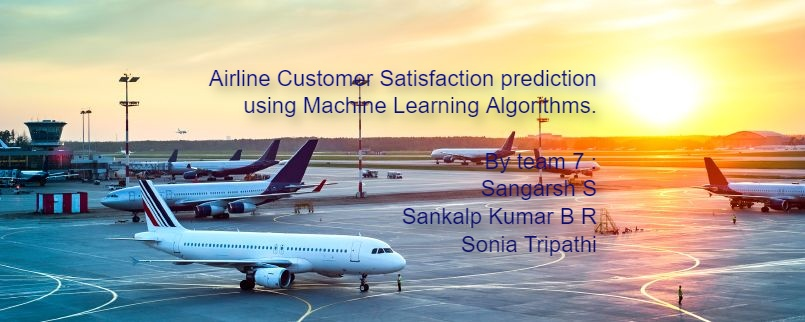

# Problem Statement 

To understand the experience of Passengers, Service Quality and their level of satisfaction with the flight services availed by them with reference to US Flights. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

# **Attribute Information:**

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral/dissatisfaction)

In [ ]:
# Reading the dataset 
df_satisfaction = pd.read_csv('../input/airline-passenger-satisfaction/train.csv',index_col='Unnamed: 0')

# First 5 obersvation
df_satisfaction.head()

In [ ]:
# First 5 observation
df_satisfaction.head()

In [ ]:
# Last 5 observation
df_satisfaction.tail()

In [ ]:
# Checking for duplicates in the dataset
df_satisfaction[df_satisfaction.duplicated()]

- **No Duplicates in the dataset.**

In [ ]:
# target variable
df_target = df_satisfaction['satisfaction']
df_target.value_counts()
sns.countplot(x = df_target,palette='husl')
plt.text(x = 0.95, y = df_target.value_counts()[1] + 1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = -0.05, y = df_target.value_counts()[0] +1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

- **Above plot shows a distribution of around 56%:44% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment.**

# **EDA**

In [ ]:
#Number of attribute and observation
print('Number of Observation:',df_satisfaction.shape[0])

print('Number of feature:',df_satisfaction.shape[1])

In [ ]:
# Checking are datatype of the attribute
df_satisfaction.dtypes

- **All the Datatype are corrected identified.**

In [ ]:
# Describe Function 
df_satisfaction.describe()

- Five Point Summary are given here.

## **Missing Value Handling**

In [ ]:
# Finding Missing Value in the Dataset
df_total = df_satisfaction.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df_satisfaction.isnull().sum()/df_satisfaction.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([df_total,percentage],keys=['Total','Percentage'],axis=1)
table

-  **Arival Delay in Minutes has missing of 0.3% and all the other variable doesnt have missing value.**

In [ ]:
sns.boxplot(df_satisfaction['Arrival Delay in Minutes'])

In [ ]:
#Checking for the median
df_satisfaction['Arrival Delay in Minutes'].median()

In [ ]:
# Replace the missing the value with median as there are outliers
df_satisfaction['Arrival Delay in Minutes'].replace(np.NaN,0,inplace=True)

In [ ]:
df_total = df_satisfaction.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df_satisfaction.isnull().sum()/df_satisfaction.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([df_total,percentage],keys=['Total','Percentage'],axis=1)
table

- **No Missing Value in the dataset**

In [ ]:
#Making a copy of the Dataset
df_sat =df_satisfaction.copy()

## **Removing Insigificant Variable**

In [ ]:
# Removing the id column as it irrelvant
df_sat.drop(['id'],axis=1,inplace=True)

In [ ]:
# Standard Deivation 
df_sat.std()

- **None of the Attribute has Standard Deviation 0 we cant remove them.**

In [ ]:
pd.crosstab(df_sat.Gender,df_sat.satisfaction).plot(kind="bar",figsize=(15,6))
plt.title('Satisfied Customer by Gender')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

- **Gender-wise distribution of dissatisfied and satisfied customers are quite same.In both the case male and female the dissatisfied customers are more than satisfied customer.**

In [ ]:
pd.crosstab(df_sat['Customer Type'],df_sat.satisfaction).plot(kind="bar",figsize=(15,6))
plt.title('Satisfied Customer by Customer Type')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

- **Loyal Customer are more in number even tho count of satisfied and dissatisfied customer is same in Loyal Customer.**

In [ ]:
g = sns.catplot("Age", data=df_sat, aspect=4.0, kind='count', hue='satisfaction', order=range(5, 80))
g.set_ylabels('Age vs Passenger Satisfaction')

In [ ]:
fig = plt.figure(figsize=(12,18))
df_num = df_sat.select_dtypes(include=np.number)
for i in range(len(df_num.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df_num.iloc[:,i])

plt.tight_layout()
plt.show()

- **Outlier are present in Departure Delay,Arrival Delay,Chechin Service and Flight Distance.**






# **Distribution of the numerical variable**

In [ ]:
df_sat.drop('satisfaction', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df_sat.drop('satisfaction', axis = 1).skew()

In [ ]:
df_sat.columns

## **Encoding**




In [ ]:
# Encoding the Categorically variable
df_cat = df_sat.loc[:,['Gender' ,'Customer Type','Type of Travel' ,'Class','satisfaction']]

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_cat.columns:
    lencoders[col] = LabelEncoder()
    df_cat[col] = lencoders[col].fit_transform(df_cat[col])
df_cat

In [ ]:
df3 = df_sat.loc[:,['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
df3

In [ ]:
df_cat1 = pd.concat([df_cat,df3],axis=1)
df_cat1

## **Scale the data**

In [ ]:
from sklearn.preprocessing import StandardScaler 
Standard_scaler = StandardScaler()
df1 = df_sat.loc[:,['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
Standard_scaler.fit(df1)
df_final = pd.DataFrame(Standard_scaler.transform(df1), columns=df1.columns)

# First 5 observation
df_final.head()

In [ ]:
df_final_draft = pd.concat([df_cat1,df_final],axis=1)
df_final_draft

## **Mutlicollinearity**

In [ ]:
# mutlicollinearity
df = df_sat.drop('satisfaction',axis=1)
sns.heatmap(df.corr()[np.abs(df.corr()>0.6)],annot=True)

- **Their is Correlation between the variable.**

## **Train-Test Split**

In [ ]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
y =df_final_draft['satisfaction']
df_num_scaled = df_final_draft.drop(['satisfaction'],axis=1)
X = sm.add_constant(df_num_scaled)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

## **Logistic Regression (Full Model)-Model 1**

In [ ]:
log_reg_full = sm.Logit(y_train,X_train).fit()
# summary
print(log_reg_full.summary())

In [ ]:
y_pred_prob = log_reg_full.predict(X_test)
y_pred_prob.head()

In [ ]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [ ]:
score_card = pd.DataFrame(columns=['Model_Name','Threshold','AUC Score','Accuracy Score','Precision Score', 'Recall Score', 'Specificity','Kappa Score','FPR','f1-score'])


In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'SimpleLogisticRegression-(FullModel)','Threshold':0.5,'AUC Score':metrics.roc_auc_score(y_test, y_pred_prob),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

## **Optimal Threshold value**

In [ ]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

 - As we can see that the optimal cut-off probability is approximately **0.5**.

## **Feature Selection Using Recursive Feature Elimination(RFE) Model-2**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# consider the independent variables (without the intercept term)
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train_rfe, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

In [ ]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df_num1 = df_final_draft.loc[:,['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes']]
X = sm.add_constant(df_num1)
y =df_final_draft['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

In [ ]:
log_reg_feature = sm.Logit(y_train,X_train).fit()
# summary
print(log_reg_feature.summary())

In [ ]:
y_pred_prob = log_reg_feature.predict(X_test)
y_pred_prob.head()

In [ ]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (significant Features)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'SimpleLogisticRegressionSelectedFeature','Threshold':0.5,'AUC Score':metrics.roc_auc_score(y_test, y_pred_prob),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

## Naive-bayes-Model 4

In [ ]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = df_final_draft.loc[:,['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

y =df_final_draft['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

In [ ]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [ ]:
y_pred = gnb_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Naive Bayes)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Navie-Bayes','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

## **KNN(k=3)-Model 5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors =3)
knn_model = knn_classification.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Knn 3)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'KNN(N=3)','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

## **GridSearchCV-Model 5**

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean','hamming','manhattan','Chebyshev']}
 
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

In [ ]:
knn_classification = KNeighborsClassifier(n_neighbors =17,metric='hamming')
knn_model = knn_classification.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (knn Best params)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'KNN(N=17)','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

## **DecisionTree-Model 6**


In [ ]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [ ]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [ ]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

decision_tree = decision_tree_classification.fit(X_train, y_train)

In [ ]:
import pydotplus
from IPython.display import Image  
labels = X_train.columns
dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Decision-Tree','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

In [ ]:
train_report = get_train_report(decision_tree)
print(train_report)

In [ ]:
test_report = get_test_report(decision_tree)
print(test_report)

**There is slight significant difference between the train and test accuracy; thus can conclude that the decision tree is less over-fitted.**

# **Grid Search decision tree - Model 7**

In [ ]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(2,10),
                     'max_leaf_nodes' : range(2,10)
                     }]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [ ]:
dt_model = DecisionTreeClassifier(criterion ='gini',
                                  max_depth = 5,
                                  max_leaf_nodes = 9,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

In [ ]:
tree.plot_tree(dt_model,filled=True)

In [ ]:
train_report = get_train_report(dt_model)
print(train_report)

In [ ]:
test_report = get_test_report(dt_model)
print(test_report)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Decision-Tree With Best Params','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

- **We see test and train data have equal accuracy.**


# **RandomForest - Model 8**

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [ ]:
train_report = get_train_report(rf_classification)
print(train_report)

In [ ]:
test_report = get_test_report(rf_classification)
print(test_report)

In [ ]:
y_pred = rf_classification.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'RandomForest','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

# **Grid Search RandomSearch - Model 9**

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11],
                     }]
 
random_forest_classification = RandomForestClassifier(random_state = 10)


rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [ ]:
rf_model = RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70,
                                  max_depth = 20,
                                  min_samples_split = 8,
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)



In [ ]:
print( get_train_report(rf_model))

In [ ]:
print(get_test_report(rf_model))

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'RandomForest With Best Params','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

# **AdaBoost Model - Model 10**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

In [ ]:
y_pred = ada_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'AdaBoost','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

# **XGBoost Model with tuned Params - Model 11**

In [ ]:
from xgboost import XGBClassifier
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [ ]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))


xgb_model = xgb_grid_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(xgb_model))

In [ ]:
y_pred = xgb_grid_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'XGBoost-TunedParams','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card